# Exploratory Data Analysis (EDA)
- Categorical - mode and countplot
- Numeric - mean, median and histogram
- Numeric / Numeric - correlation, scatter
- Categorical / Categorical - pivot
- Categorical / Numeric - violin plot

## Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

In [5]:
# Define the path to your CSV file
csv_file_path = r'data_preperation\data\usda_wheat_planted_harvested_ndvi_2015_2022.csv'

# Load the CSV file into a dataframe
df = pd.read_csv(csv_file_path)

## Step 1: Data Understanding
- Dataframe shape
- head and tail
- dtypes
- describe

In [6]:
df.shape

(7100, 39)

In [8]:
df.head(3)

,Year,Period,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Commodity,ACRES PLANTED,ACRES HARVESTED,20-Aug,03-Sep,17-Sep,01-Oct,15-Oct,29-Oct,12-Nov,26-Nov,10-Dec,24-Dec,07-Jan,21-Jan,04-Feb,18-Feb,04-Mar,18-Mar,01-Apr,15-Apr,29-Apr,13-May,27-May,10-Jun,24-Jun,08-Jul,22-Jul,05-Aug,19-Aug
0,2015,YEAR,COUNTY,ARKANSAS,5,CENTRAL,50,CONWAY,29,WHEAT,6300,2500,0.432654,0.458710,0.157778,0.348771,0.409232,0.561924,0.556003,NaN,0.481936,0.07096,0.232851,0.581832,0.577173,NaN,0.547829,0.448493,0.272113,0.478089,0.662452,0.216036,0.187413,0.362073,0.403162,0.477341,0.572566,0.597223,0.019030
1,2015,YEAR,COUNTY,ARKANSAS,5,CENTRAL,50,PULASKI,119,WHEAT,2900,1300,0.458387,0.415332,0.164647,0.554321,0.445305,0.369411,0.309151,NaN,0.259269,0.15128,0.091631,0.283415,0.362074,NaN,0.246177,0.055786,0.346122,0.116799,NaN,0.089187,0.301194,0.285528,0.446527,0.535910,0.481618,0.425837,0.270037
2,2015,YEAR,COUNTY,ARKANSAS,5,EAST CENTRAL,60,ARKANSAS,1,WHEAT,11600,10000,0.499771,0.458410,0.405882,0.231392,0.323971,0.366453,0.370766,0.051955,0.051748,0.22361,NaN,0.136972,0.444855,0.195491,NaN,0.262109,0.354606,0.289181,0.649794,0.286149,0.332770,0.397920,0.444743,0.464777,0.412733,0.389541,0.424397


In [9]:
df.columns

Index(['Year', 'Period', 'Geo Level', 'State', 'State ANSI', 'Ag District',
       'Ag District Code', 'County', 'County ANSI', 'Commodity',
       'ACRES PLANTED', 'ACRES HARVESTED', '20-Aug', '03-Sep', '17-Sep',
       '01-Oct', '15-Oct', '29-Oct', '12-Nov', '26-Nov', '10-Dec', '24-Dec',
       '07-Jan', '21-Jan', '04-Feb', '18-Feb', '04-Mar', '18-Mar', '01-Apr',
       '15-Apr', '29-Apr', '13-May', '27-May', '10-Jun', '24-Jun', '08-Jul',
       '22-Jul', '05-Aug', '19-Aug'],
      dtype='object')

In [10]:
df.dtypes

Year                  int64
Period               object
Geo Level            object
State                object
State ANSI            int64
Ag District          object
Ag District Code      int64
County               object
County ANSI           int64
Commodity            object
ACRES PLANTED         int64
ACRES HARVESTED       int64
20-Aug              float64
03-Sep              float64
17-Sep              float64
01-Oct              float64
15-Oct              float64
29-Oct              float64
12-Nov              float64
26-Nov              float64
10-Dec              float64
24-Dec              float64
07-Jan              float64
21-Jan              float64
04-Feb              float64
18-Feb              float64
04-Mar              float64
18-Mar              float64
01-Apr              float64
15-Apr              float64
29-Apr              float64
13-May              float64
27-May              float64
10-Jun              float64
24-Jun              float64
08-Jul              

In [11]:
df.describe()

,Year,State ANSI,Ag District Code,County ANSI,ACRES PLANTED,ACRES HARVESTED,20-Aug,03-Sep,17-Sep,01-Oct,15-Oct,29-Oct,12-Nov,26-Nov,10-Dec,24-Dec,07-Jan,21-Jan,04-Feb,18-Feb,04-Mar,18-Mar,01-Apr,15-Apr,29-Apr,13-May,27-May,10-Jun,24-Jun,08-Jul,22-Jul,05-Aug,19-Aug
count,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7004.000000,6966.000000,6941.000000,6972.000000,6937.000000,6720.000000,6887.000000,6754.000000,6783.000000,6824.000000,6698.000000,6826.000000,6644.000000,6791.000000,6867.000000,6922.000000,6871.000000,6977.000000,6857.000000,6926.000000,6996.000000,7044.000000,7039.000000,7059.000000,7042.000000,7027.000000,7015.000000
mean,2018.370000,32.174507,49.522394,102.640282,29432.070423,23501.722535,0.382024,0.369130,0.298612,0.243305,0.226627,0.241333,0.245274,0.232903,0.218135,0.199237,0.151244,0.172674,0.164322,0.201519,0.211392,0.269815,0.315443,0.354390,0.367904,0.335696,0.369884,0.315614,0.313131,0.306232,0.309736,0.314566,0.327697
std,2.344803,13.063763,25.467450,87.042393,51050.699463,44157.687620,0.221311,0.197241,0.153424,0.136613,0.142036,0.141283,0.153507,0.158435,0.172967,0.179032,0.157454,0.159145,0.163438,0.175404,0.176981,0.203025,0.219264,0.231326,0.226809,0.225206,0.210280,0.174137,0.139632,0.139174,0.151372,0.168034,0.180442
min,2015.000000,5.000000,10.000000,1.000000,200.000000,60.000000,-0.060211,-0.057281,-0.044001,-0.053419,-0.059314,-0.040526,-0.034297,-0.043715,-0.038974,-0.041391,-0.080272,-0.046999,-0.063219,-0.067604,-0.065663,-0.075791,-0.055517,-0.058952,-0.067499,-0.121821,-0.061602,-0.042977,-0.035183,-0.061100,-0.061526,-0.055130,-0.049316
25%,2016.000000,20.000000,30.000000,43.000000,3100.000000,2200.000000,0.207352,0.217027,0.189527,0.146867,0.113923,0.119718,0.102764,0.079803,0.055622,0.035351,0.024143,0.030264,0.025304,0.040329,0.052402,0.080925,0.121486,0.148308,0.167647,0.129177,0.204992,0.193417,0.223199,0.218374,0.206800,0.196646,0.191436
50%,2018.000000,31.000000,50.000000,87.000000,7600.000000,5780.000000,0.358301,0.360815,0.294925,0.257274,0.248012,0.256064,0.259556,0.238581,0.197392,0.154198,0.083628,0.129738,0.102544,0.168779,0.182445,0.246455,0.296535,0.351807,0.386110,0.329270,0.361606,0.312408,0.309387,0.312447,0.310277,0.305787,0.310382
75%,2020.000000,42.000000,70.000000,141.000000,27100.000000,20100.000000,0.571775,0.532698,0.411126,0.332911,0.324895,0.347487,0.361861,0.356238,0.348399,0.343640,0.262828,0.293012,0.282147,0.333210,0.337726,0.428279,0.488184,0.543846,0.554946,0.523666,0.533281,0.431695,0.399532,0.396742,0.412989,0.431442,0.455561
max,2022.000000,56.000000,96.000000,810.000000,416500.000000,410000.000000,0.922321,0.864088,0.810698,0.776486,0.741860,0.737384,0.736162,0.740811,0.796791,0.823360,0.806705,0.728668,0.811756,0.803688,0.805330,0.868116,0.876228,0.884543,0.869592,0.849831,0.883784,0.852451,0.865558,0.798054,0.877078,0.924081,0.928466


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              7100 non-null   int64  
 1   Period            7100 non-null   object 
 2   Geo Level         7100 non-null   object 
 3   State             7100 non-null   object 
 4   State ANSI        7100 non-null   int64  
 5   Ag District       7100 non-null   object 
 6   Ag District Code  7100 non-null   int64  
 7   County            7100 non-null   object 
 8   County ANSI       7100 non-null   int64  
 9   Commodity         7100 non-null   object 
 10  ACRES PLANTED     7100 non-null   int64  
 11  ACRES HARVESTED   7100 non-null   int64  
 12  20-Aug            7004 non-null   float64
 13  03-Sep            6966 non-null   float64
 14  17-Sep            6941 non-null   float64
 15  01-Oct            6972 non-null   float64
 16  15-Oct            6937 non-null   float64


## Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [13]:
# Rename our columns
df = df.rename(columns={'ACRES PLANTED' : 'Acres_Planted', 
                        'ACRES HARVESTED' : 'Acres_Harvested'})

In [14]:
# Calculate a new column 'Hectar_Planted' based on columns 'Acres_Planted'
df['Hectar_Planted'] = df['Acres_Planted'] / 2.47105

In [15]:
# Calculate a new column 'Loss_perc' based on columns 'Acres_Planted' and 'Acres_Harvested'
df['Loss_perc'] = ((df['Acres_Planted'] - df['Acres_Harvested']) / df['Acres_Planted']).apply(lambda x: round(x, 2))

In [16]:
df['crop_health'] = 1 - df['Loss_perc'] # in %

In [22]:
df.head(3)

,Year,Period,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Commodity,Acres_Planted,Acres_Harvested,20-Aug,03-Sep,17-Sep,01-Oct,15-Oct,29-Oct,12-Nov,26-Nov,10-Dec,24-Dec,07-Jan,21-Jan,04-Feb,18-Feb,04-Mar,18-Mar,01-Apr,15-Apr,29-Apr,13-May,27-May,10-Jun,24-Jun,08-Jul,22-Jul,05-Aug,19-Aug,Hectar_Planted,Loss_perc,crop_health
0,2015,YEAR,COUNTY,ARKANSAS,5,CENTRAL,50,CONWAY,29,WHEAT,6300,2500,0.432654,0.458710,0.157778,0.348771,0.409232,0.561924,0.556003,NaN,0.481936,0.07096,0.232851,0.581832,0.577173,NaN,0.547829,0.448493,0.272113,0.478089,0.662452,0.216036,0.187413,0.362073,0.403162,0.477341,0.572566,0.597223,0.019030,2549.523482,0.60,0.40
1,2015,YEAR,COUNTY,ARKANSAS,5,CENTRAL,50,PULASKI,119,WHEAT,2900,1300,0.458387,0.415332,0.164647,0.554321,0.445305,0.369411,0.309151,NaN,0.259269,0.15128,0.091631,0.283415,0.362074,NaN,0.246177,0.055786,0.346122,0.116799,NaN,0.089187,0.301194,0.285528,0.446527,0.535910,0.481618,0.425837,0.270037,1173.590174,0.55,0.45
2,2015,YEAR,COUNTY,ARKANSAS,5,EAST CENTRAL,60,ARKANSAS,1,WHEAT,11600,10000,0.499771,0.458410,0.405882,0.231392,0.323971,0.366453,0.370766,0.051955,0.051748,0.22361,NaN,0.136972,0.444855,0.195491,NaN,0.262109,0.354606,0.289181,0.649794,0.286149,0.332770,0.397920,0.444743,0.464777,0.412733,0.389541,0.424397,4694.360697,0.14,0.86


In [17]:
# Calculate number of missing values in df
number_missing = df.isnull().sum()

# Create a new DataFrame with columns from df and index set to None
new_df = pd.DataFrame(columns=df.columns, index=None)
pd.set_option('display.max_columns', None)

# Creating new Percentage index
new_df.loc['Number'] = number_missing.values
new_df

,Year,Period,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Commodity,Acres_Planted,Acres_Harvested,20-Aug,03-Sep,17-Sep,01-Oct,15-Oct,29-Oct,12-Nov,26-Nov,10-Dec,24-Dec,07-Jan,21-Jan,04-Feb,18-Feb,04-Mar,18-Mar,01-Apr,15-Apr,29-Apr,13-May,27-May,10-Jun,24-Jun,08-Jul,22-Jul,05-Aug,19-Aug,Hectar_Planted,Loss_perc,crop_health
Number,0,0,0,0,0,0,0,0,0,0,0,0,96,134,159,128,163,380,213,346,317,276,402,274,456,309,233,178,229,123,243,174,104,56,61,41,58,73,85,0,0,0


In [18]:
# Calculate the percentage of missing values in df_read
percentage_missing = df.isnull().sum() / len(df) * 100

# Create a new DataFrame with columns from df and index set to None
new_df = pd.DataFrame(columns=df.columns, index=None)
pd.set_option('display.max_columns', None)

# Creating new Percentage index
new_df.loc['Percentage'] = percentage_missing.values
new_df

,Year,Period,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Commodity,Acres_Planted,Acres_Harvested,20-Aug,03-Sep,17-Sep,01-Oct,15-Oct,29-Oct,12-Nov,26-Nov,10-Dec,24-Dec,07-Jan,21-Jan,04-Feb,18-Feb,04-Mar,18-Mar,01-Apr,15-Apr,29-Apr,13-May,27-May,10-Jun,24-Jun,08-Jul,22-Jul,05-Aug,19-Aug,Hectar_Planted,Loss_perc,crop_health
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.352113,1.887324,2.239437,1.802817,2.295775,5.352113,3.0,4.873239,4.464789,3.887324,5.661972,3.859155,6.422535,4.352113,3.28169,2.507042,3.225352,1.732394,3.422535,2.450704,1.464789,0.788732,0.859155,0.577465,0.816901,1.028169,1.197183,0.0,0.0,0.0


In [19]:
# Keeping only those features with less than 20% of missing values
features_to_keep = df.columns[((df.isnull().sum()/len(df))*100 < 20)].to_list()
print("Total features before:",len(df.columns))
print("Total features now:",len(features_to_keep))

Total features before: 42
Total features now: 42


In [20]:
df_sel = df[[#'Year', 
            #'State', #'State ANSI', 
            #'County',
            #'Hectar_Planted',
            #'ACRES Harvested', 'Acres Loss', 'Hectare Planted', 'Hectare Harvested',
            #'Hectare Loss', 
            '20-Aug', '03-Sep', '17-Sep', '01-Oct',
            '15-Oct', '29-Oct', '12-Nov', '26-Nov', '10-Dec', '24-Dec', '07-Jan',
            '21-Jan', '04-Feb', '18-Feb', '04-Mar', '18-Mar', '01-Apr', '15-Apr',
            '29-Apr', '13-May', '27-May', '10-Jun', '24-Jun', '08-Jul', '22-Jul',
            '05-Aug', '19-Aug', 'crop_health']].copy()

In [21]:
df_sel.head(3)

,20-Aug,03-Sep,17-Sep,01-Oct,15-Oct,29-Oct,12-Nov,26-Nov,10-Dec,24-Dec,07-Jan,21-Jan,04-Feb,18-Feb,04-Mar,18-Mar,01-Apr,15-Apr,29-Apr,13-May,27-May,10-Jun,24-Jun,08-Jul,22-Jul,05-Aug,19-Aug,crop_health
0,0.432654,0.458710,0.157778,0.348771,0.409232,0.561924,0.556003,NaN,0.481936,0.07096,0.232851,0.581832,0.577173,NaN,0.547829,0.448493,0.272113,0.478089,0.662452,0.216036,0.187413,0.362073,0.403162,0.477341,0.572566,0.597223,0.019030,0.40
1,0.458387,0.415332,0.164647,0.554321,0.445305,0.369411,0.309151,NaN,0.259269,0.15128,0.091631,0.283415,0.362074,NaN,0.246177,0.055786,0.346122,0.116799,NaN,0.089187,0.301194,0.285528,0.446527,0.535910,0.481618,0.425837,0.270037,0.45
2,0.499771,0.458410,0.405882,0.231392,0.323971,0.366453,0.370766,0.051955,0.051748,0.22361,NaN,0.136972,0.444855,0.195491,NaN,0.262109,0.354606,0.289181,0.649794,0.286149,0.332770,0.397920,0.444743,0.464777,0.412733,0.389541,0.424397,0.86


### Method 1: Dropping missing values

https://www.youtube.com/shorts/-tcmWp76IYw : video to deal with missing data

In [23]:
df_prep = pd.DataFrame()

# Assuming your dataset is stored in a DataFrame called 'df'
df_prep = df_sel.dropna().reset_index(drop=True)

print(df_prep.shape)

# Visualize the distribution of NDVI values
#df_prep['01-Oct'].plot.hist(bins=24)
#plt.show()

(4679, 28)


### Method 2: Filling missing values with a constant

In [25]:
df_prep = pd.DataFrame()

# Assuming your dataset is stored in a DataFrame called 'df'
df_prep = df_sel.fillna(0)  # Fill missing values with -999

print(df_prep.shape)

# Visualize the distribution of NDVI values
#df_prep['01-Oct'].plot.hist(bins=24)
#plt.show()

(7119, 29)


### Method 3: Filling missing values with the mean

In [ ]:
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mode()[0])
df['revol_util']=df['revol_util'].fillna(df['revol_util'].median())

In [36]:
df_prep = pd.DataFrame()

for col in df_sel.columns:

    df_prep[col] = df_sel[col].fillna(df_sel[col].mean())

print(df_prep.shape)

# Visualize the distribution of NDVI values
#df_prep['01-Oct'].plot.hist(bins=24)
#plt.show()

(7119, 29)


### Method 4: Filling missing values with a machine learning approach

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Step 2: Check for empty rows and drop them
df_del = df_sel.dropna(how='all')

ndvi_cols = ['20-Aug', '03-Sep', '17-Sep', '01-Oct', '15-Oct', '29-Oct', '12-Nov', 
             '26-Nov', '10-Dec', '24-Dec', '07-Jan', '21-Jan', '04-Feb', '18-Feb', 
             '04-Mar', '18-Mar', '01-Apr', '15-Apr', '29-Apr', '13-May', '27-May', 
             '10-Jun', '24-Jun', '08-Jul', '22-Jul', '05-Aug', '19-Aug']

# Step 3: Perform machine learning-based imputation
imputer = IterativeImputer()
df_ndvi_prep = pd.DataFrame(imputer.fit_transform(df_del[ndvi_cols]), columns = ndvi_cols)

# Assemble the columns into a new dataframe
df_prep = pd.concat([df_del['Hectar_Planted'], df_ndvi_prep, df_del['Loss_perc']], axis=1)

print(df_prep.shape)

(7100, 29)


In [24]:
# Look for duplicates
df_prep.loc[df.duplicated()]

,20-Aug,03-Sep,17-Sep,01-Oct,15-Oct,29-Oct,12-Nov,26-Nov,10-Dec,24-Dec,07-Jan,21-Jan,04-Feb,18-Feb,04-Mar,18-Mar,01-Apr,15-Apr,29-Apr,13-May,27-May,10-Jun,24-Jun,08-Jul,22-Jul,05-Aug,19-Aug,crop_health


## Step 3: Feature Understanding (Univariate analysis)
- Plotting Feature Distributions
- Histogram
- KDE
- Boxplot

In [ ]:
df['Year'].value_counts()

In [ ]:
ax = df['Year'].value_counts().plot(kind='bar', title='top years wheat crop records in dataset')
ax.set_xlabel('year')
ax.set_ylabel('data records')
plt.show()

## Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

In [ ]:
df.plot(kind='scatter',
        x='Hectare Loss',
        y='Hectare Planted',
        title='Hectare Planted vs. Hectare Loss')
plt.show()

In [ ]:
sns.scatterplot(x='Hectare Loss',
                y='Hectare Planted',
                hue='Year',
                data=df)
plt.show()

In [ ]:
df.plot(kind='scatter',
        x='% of Loss',
        y='Hectare Planted',
        title='Hectare Planted vs. Percentage of Loss')
plt.show()

# Train and Compare

In [26]:
df_prep.head(3)

,20-Aug,03-Sep,17-Sep,01-Oct,15-Oct,29-Oct,12-Nov,26-Nov,10-Dec,24-Dec,07-Jan,21-Jan,04-Feb,18-Feb,04-Mar,18-Mar,01-Apr,15-Apr,29-Apr,13-May,27-May,10-Jun,24-Jun,08-Jul,22-Jul,05-Aug,19-Aug,crop_health
0,0.304065,0.240866,0.220649,0.181981,0.182596,0.166365,0.051951,0.087218,0.226187,0.417274,0.483819,0.447618,0.486692,0.774783,0.739392,0.733345,0.502412,0.624829,0.453783,0.305393,0.137903,0.241491,0.241089,0.220767,0.200270,0.192777,0.211336,0.80
1,0.263523,0.246879,0.239628,0.213422,0.189560,0.172317,0.033319,0.113984,0.321454,0.383690,0.417153,0.510099,0.603886,0.723156,0.710825,0.742545,0.640484,0.539793,0.426153,0.295174,0.151592,0.231155,0.220825,0.230236,0.226823,0.225876,0.239571,0.56
2,0.273938,0.236688,0.218312,0.183413,0.213881,0.206815,0.044403,0.055073,0.346480,0.383721,0.499539,0.335674,0.395636,0.747532,0.719433,0.735968,0.380136,0.565847,0.389362,0.293689,0.222424,0.269147,0.244743,0.235951,0.218095,0.212535,0.186639,0.88


In [27]:
Target = 'crop_health'
Input = ['20-Aug', '03-Sep', '17-Sep', '01-Oct', '15-Oct', '29-Oct', '12-Nov', 
        '26-Nov', '10-Dec', '24-Dec', '07-Jan', '21-Jan', '04-Feb', '18-Feb', 
        '04-Mar', '18-Mar', '01-Apr', '15-Apr', '29-Apr', '13-May', '27-May', 
        '10-Jun', '24-Jun', '08-Jul', '22-Jul', '05-Aug', '19-Aug']

In [29]:
from sklearn.model_selection import train_test_split

X = df_prep[Input]  # Features (NDVI timeseries)
y = df_prep['crop_health'].values  # Target variable (crop health)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model: Linear Regression
MSE: 0.0352
RMSE: 0.1876
R-squared: 0.1856
-------------------------------------
Model: Random Forest
MSE: 0.0230
RMSE: 0.1518
R-squared: 0.4670
-------------------------------------
Model: SVR
MSE: 0.0229
RMSE: 0.1513
R-squared: 0.4702
-------------------------------------
Model: xgb
MSE: 0.0255
RMSE: 0.1596
R-squared: 0.4110
-------------------------------------


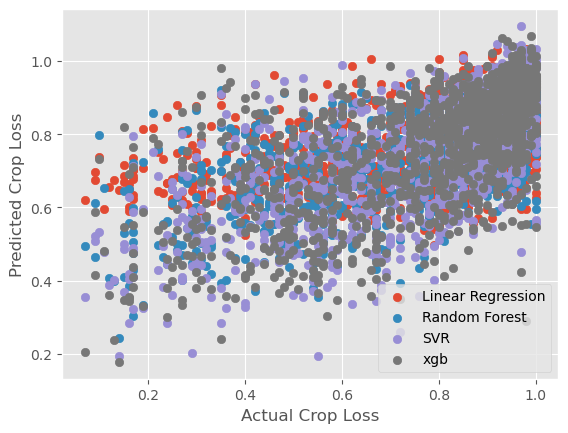

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer

# Initialize the models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor()
svr = SVR()
xgb = XGBRegressor()

# Train and evaluate each model
models = [linear_reg, random_forest_reg, svr, xgb]
model_names = ['Linear Regression', 'Random Forest', 'SVR', 'xgb']
for model, name in zip(models, model_names):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"Model: {name}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print("-------------------------------------")
    plt.scatter(y_test, y_pred, label=name)

plt.xlabel('Actual Crop Loss')
plt.ylabel('Predicted Crop Loss')
plt.legend()
plt.show()

Save the best model

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.datasets import make_regression

# Generate a sample regression dataset
#X, y = make_regression(n_samples=100, n_features=10)

# Define the parameter grid to search
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create the SVR model
model = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X, y)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


MSE: 0.0229
RMSE: 0.1513
R-squared: 0.4702
-------------------------------------


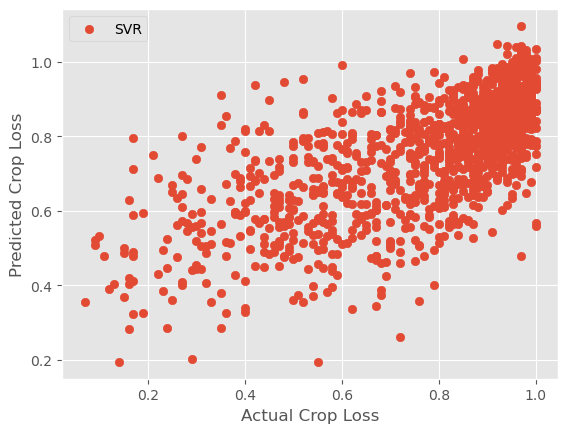

['best_scaler.pkl']

In [32]:
import joblib
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = SVR()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
print("-------------------------------------")

plt.scatter(y_test, y_pred, label='SVR')
plt.xlabel('Actual Crop Loss')
plt.ylabel('Predicted Crop Loss')
plt.legend()
plt.show()

# Save the model to memory
joblib.dump(model, 'best_model.pkl')
joblib.dump(scaler, 'best_scaler.pkl')

In [1]:
import geemap

# Create a map and add the clipped NDVI map
Map = geemap.Map(basemap = 'SATELLITE')

Map.addLayerControl()
# Display the map
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [2]:
from get_crop_health import *
import ee
from get_land_use_area import *

roi = ee.FeatureCollection(Map.draw_features)

start_date = '2021-08-20'
end_date = '2022-08-20'

#get_land_area(roi)
#new_data = get_ndvi_serie(roi, start_date, end_date)
get_crop_health(roi, start_date, end_date)

array([0.60906503])